In [1]:
import pandas as pd
import os
import swat
import time
from pprint import pprint

## Connection to CAS

In [2]:
os.environ['CAS_CLIENT_SSL_CA_LIST'] = '/opt/sas/viya/config/etc/SASSecurityCertificateFramework/cacerts/trustedcerts.pem'
#os.environ['CAS_CLIENT_SSL_CA_LIST'] = '/mnt/c/Users/frasep/OneDrive - SAS/Mes Documents/Dossiers/Demoing/My_Azure_Environments/terraform_monoserver/cacerts/'

cashost='frasepviya35smp.cloud.com'
casport=5570
s = swat.CAS(cashost, casport)
s.sessionProp.setSessOpt(timeout=1800, caslib='casuser', messageLevel="ALL", metrics='true')

NOTE: 'CASUSER(viyademo01)' is now the active caslib.
NOTE: Action 'sessionProp.setSessOpt' used (Total process time):
NOTE:       real time               0.000328 seconds
NOTE:       cpu time                0.000313 seconds (95.43%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  265.19K (0.00%)


+ Elapsed: 0.000328s, sys: 0.000313s, mem: 0.259mb

In [3]:
s.loadActionset('fedSql')
s.loadActionset('sampling')
s.loadActionset('datapreprocess')

NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'fedSql'.
NOTE: Action 'builtins.loadActionSet' used (Total process time):
NOTE:       real time               0.180627 seconds
NOTE:       cpu time                0.002809 seconds (1.56%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  246.06K (0.00%)
NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'sampling'.
NOTE: Action 'builtins.loadActionSet' used (Total process time):
NOTE:       real time               0.337500 seconds
NOTE:       cpu time                0.004937 seconds (1.46%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  230.94K (0.00%)
NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'datapreprocess'.
NOTE: Action 'builtins.loadActionSet' used (Total process time):
NOTE:       real time          

[actionset]

 'datapreprocess'

+ Elapsed: 0.000404s, user: 0.000372s, mem: 0.205mb

In [4]:
s.table.addcaslib(name="AzureDL", dataSource={"srctype":"adls", "accountname":'frasepstorage',"filesystem":"datalake", "tenantid":"b1c14d5c-3625-45b3-a430-9552373a0c2f","applicationId":"e7af42e8-3ca8-47bb-97ce-ac764019be3a","timeout":"50000"}, path="/", subDirectories="True", session="True")

NOTE: Executing action 'table.addCaslib'.
NOTE: 'AzureDL' is now the active caslib.
NOTE: Cloud Analytic Services added the caslib 'AzureDL'.
NOTE: Action 'table.addCaslib' used (Total process time):
NOTE:       real time               0.000903 seconds
NOTE:       cpu time                0.000865 seconds (95.79%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  766.66K (0.00%)


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,AzureDL,adls,,/,timeout = 50000,1.0,1.0,1.0,0.0,0.0,0.0
1,AzureDL,,,,accountName = 'frasepstorage',NaN,NaN,NaN,NaN,NaN,NaN
2,AzureDL,,,,fileSystem = 'datalake',NaN,NaN,NaN,NaN,NaN,NaN
3,AzureDL,,,,tenantId = 'b1c14d5c-3625-45b3-a430-9552373a0c2f',NaN,NaN,NaN,NaN,NaN,NaN
4,AzureDL,,,,applicationId = 'e7af42e8-3ca8-47bb-97ce-ac764...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
s.table.fileinfo(caslib="AzureDL", allfiles="true", includedirectories="true")

NOTE: Executing action 'table.fileInfo'.
NOTE: Action 'table.fileInfo' used (Total process time):
NOTE:       real time               2.010604 seconds
NOTE:       cpu time                0.035107 seconds (1.75%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  1.21M (0.00%)


,Permission,Owner,Group,Name,Size,Time,ModTime,ETag
0,-rw-r-----,$superuser,$superuser,CHURN_DONNEES_CLIENT_BRUTES_FR.orc,466761,2020-09-03T07:41:18+00:00,1.914738e+09,0x8D84FDCBEF7ABE2
1,-rw-r-----,$superuser,$superuser,CHURN_FR.orc,63883,2020-09-03T07:41:19+00:00,1.914738e+09,0x8D84FDCBF1BAF65
2,-rw-r-----,Sebastien.Poussart@sas.com,$superuser,ds_output_megacorp5_4m.orc,30101,2021-04-12T16:34:50+00:00,1.933864e+09,0x8D8FDD0E47BD455
3,-rw-r-----,Sebastien.Poussart@sas.com,$superuser,hmeq_train.orc,63717,2021-01-04T15:29:21+00:00,1.925393e+09,0x8D8B0C582229685
4,-rw-r-----,Sebastien.Poussart@sas.com,$superuser,megacorp5_4m.orc,94724253,2020-09-08T20:14:46+00:00,1.915215e+09,0x8D85433D4EF5A75
5,-rw-r-----,$superuser,$superuser,megacorp5_4m.parquet,105649807,2021-12-03T08:34:37+00:00,1.954140e+09,0x8D9B637BE214EB7
6,drwxr-x---,$superuser,$superuser,megacorp5_4m_part.parquet,0,2021-12-03T11:29:10+00:00,1.954150e+09,0x8D9B650208CD6CF


In [9]:
s.table.loadtable(caslib="AzureDL", path="megacorp5_4m.orc", casout="megacorp5_4m");

NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the external data from megacorp5_4m.orc available as table MEGACORP5_4M in caslib AzureDL.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               18.326430 seconds
NOTE:       cpu time                15.959375 seconds (87.08%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  31.05M (0.02%)


## Create personal CAS libraries to execute the tests

In [10]:
s.table.addcaslib(name="dnfs", dataSource={"srctype":"dnfs"}, path="/mnt/demo/dnfs")
s.table.addcaslib(name="mydata", dataSource={"srctype":"path"}, path="/mnt/demo/sasdata")

NOTE: Executing action 'table.addCaslib'.
NOTE: Action 'table.addCaslib' used (Total process time):
NOTE:       real time               0.000654 seconds
NOTE:       cpu time                0.000630 seconds (96.33%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  347.22K (0.00%)
NOTE: Executing action 'table.addCaslib'.
NOTE: Action 'table.addCaslib' used (Total process time):
NOTE:       real time               0.000492 seconds
NOTE:       cpu time                0.000458 seconds (93.09%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  336.19K (0.00%)


ERROR: The caslib dnfs is a duplicate, parent or subpath of caslib DNFS.
ERROR: Could not add caslib 'dnfs'. Make sure that the caslib does not already exist and that you have permissions to add caslibs to Cloud Analytic Services.
ERROR: The action stopped due to errors.
ERROR: The caslib mydata is a duplicate, parent or subpath of caslib mycas.
ERROR: Could not add caslib 'mydata'. Make sure that the caslib does not already exist and that you have permissions to add caslibs to Cloud Analytic Services.
ERROR: The action stopped due to errors.


+ Elapsed: 0.000492s, user: 0.000385s, sys: 7.3e-05s, mem: 0.328mb

In [12]:
s.table.save(caslib="dnfs",name="megacorp5_4m_part.parquet",table={"caslib":"AzureDL","name":"megacorp5_4m"}, replace="true")

NOTE: Executing action 'table.save'.
NOTE: Cloud Analytic Services saved the file megacorp5_4m_part.parquet in caslib DNFS.
NOTE: Action 'table.save' used (Total process time):
NOTE:       real time               11.038929 seconds
NOTE:       cpu time                31.102243 seconds (281.75%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  1.77G (1.41%)


[caslib]

 'DNFS'

[name]

 'megacorp5_4m_part.parquet'

+ Elapsed: 11s, user: 29.6s, sys: 1.51s, mem: 1.82e+03mb

In [14]:
s.table.save(caslib="mycas",name="megacorp5_4m.sas7bdat",table={"caslib":"AzureDL","name":"megacorp5_4m"},replace="true")

NOTE: Executing action 'table.save'.
NOTE: Cloud Analytic Services saved the file megacorp5_4m.sas7bdat in caslib mycas.
NOTE: Action 'table.save' used (Total process time):
NOTE:       real time               7.688596 seconds
NOTE:       cpu time                7.587201 seconds (98.68%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  21.43M (0.02%)


[caslib]

 'mycas'

[name]

 'megacorp5_4m.sas7bdat'

+ Elapsed: 7.69s, user: 5.01s, sys: 2.57s, mem: 21.4mb

In [15]:
s.table.fileinfo(caslib="dnfs", allfiles='true', includedirectories='true')

NOTE: Executing action 'table.fileInfo'.
NOTE: Action 'table.fileInfo' used (Total process time):
NOTE:       real time               0.000973 seconds
NOTE:       cpu time                0.000946 seconds (97.23%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  715.75K (0.00%)


,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,drwx------,viyademo01,marketing,megacorp5_4m_part.parquet,4096,,2021-12-03T12:53:29+00:00,1.954155e+09


In [17]:
s.table.fileinfo(caslib="mycas", allfiles='true', includedirectories='true')

NOTE: Executing action 'table.fileInfo'.
NOTE: Action 'table.fileInfo' used (Total process time):
NOTE:       real time               0.000900 seconds
NOTE:       cpu time                0.000875 seconds (97.22%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  703.59K (0.00%)


,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwx------,viyademo01,marketing,megacorp5_4m.sas7bdat,1774985216,,2021-12-03T12:54:11+00:00,1.954155e+09


In [33]:
# Necessary if no test file as been already loaded in parquet file
s.table.loadtable(caslib="mydata", path="megacorp5_4m.sas7bdat", casout={"name":"megacorp5_4m", "caslib":"mydata"})
s.table.tabledetails(caslib="mydata", name="megacorp5_4m")
#s.table.save(caslib="dnfs", name="megacorp5_4m.parquet", table={"caslib":"mydata","name":"megacorp5_4m"}, replace="true")

NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the file megacorp5_4m.sas7bdat available as table MEGACORP5_4M in caslib mydata.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               3.589239 seconds
NOTE:       cpu time                3.588751 seconds (99.99%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  19.68M (0.02%)
NOTE: Executing action 'table.tableDetails'.
NOTE: Action 'table.tableDetails' used (Total process time):
NOTE:       real time               0.000935 seconds
NOTE:       cpu time                0.000904 seconds (96.68%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  723.31K (0.00%)


,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows
0,ALL,1795,1795,4522868,0,1881513088,0,0,0,1792,1878797312,0,0,3,2923648,0


### Get the size of generated partitioned parquet file

In [18]:
stream = os.popen("du -sh /mnt/demo/dnfs/megacorp5_4m_part.parquet")
output = stream.read()
print(output)

132M	/mnt/demo/dnfs/megacorp5_4m_part.parquet



### Get the size of original sas7bdat file

In [19]:
stream = os.popen("du -sh /mnt/demo/sasdata/megacorp5_4m.sas7bdat")
output = stream.read()
print(output)

1.7G	/mnt/demo/sasdata/megacorp5_4m.sas7bdat



In [20]:
s.table.columninfo(table={"caslib":"dnfs", "name":"megacorp5_4m_part.parquet"})

NOTE: Executing action 'table.columnInfo'.
NOTE: Action 'table.columnInfo' used (Total process time):
NOTE:       real time               0.003445 seconds
NOTE:       cpu time                0.003419 seconds (99.25%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  859.72K (0.00%)


,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Date,,1,double,8,12,,0,0
1,DateByYear,,2,double,8,12,,0,0
2,DateByMonth,,3,double,8,12,,0,0
3,DayOfWeek,,4,double,8,12,,0,0
4,FacilityID,,5,double,8,12,,0,0
5,Facility,,6,char,7,7,,0,0
6,FacilityType,,7,char,5,5,,0,0
7,FacilityAge,,8,double,8,12,,0,0
8,EmployeesUsed,,9,double,8,12,,0,0
9,FacilityRegion,,10,char,5,5,,0,0


In [38]:
s.table.columninfo(table={"caslib":"mydata", "name":"megacorp5_4m.sas7bdat"})

NOTE: Executing action 'table.columnInfo'.
NOTE: Action 'table.columnInfo' used (Total process time):
NOTE:       real time               0.002337 seconds
NOTE:       cpu time                0.002309 seconds (98.80%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  874.44K (0.00%)


,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Date,,1,double,8,12,BEST,12,0
1,DateByYear,,2,double,8,12,BEST,12,0
2,DateByMonth,,3,double,8,12,BEST,12,0
3,DayOfWeek,,4,double,8,12,BEST,12,0
4,FacilityID,,5,double,8,12,BEST,12,0
5,Facility,,6,char,7,7,$,7,0
6,FacilityType,,7,char,5,5,$,5,0
7,FacilityAge,,8,double,8,12,BEST,12,0
8,EmployeesUsed,,9,double,8,12,BEST,12,0
9,FacilityRegion,,10,char,5,5,$,5,0


### Compute aggregates direclty on parquet files using CAS processing native support of parquet data without any data conversion to default CAS in-memory format

In [18]:
s.simple.summary(
        inputs={"Revenue","Expenses"},
        subSet={"SUM"},
        table={"caslib":"dnfs", "name":"megacorp5_4m_part.parquet", "groupBy":{"FacilityRegion","product","ProductLine","Productbrand"}}, 
        casout={"caslib":"casuser","name":"megacorp_summary","replace":"True","replication":"0"})

castbl = s.CASTable(caslib="casuser", name="megacorp_summary")
castbl.head()

NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.005863 seconds
NOTE:       cpu time                0.005835 seconds (99.52%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  703.53K (0.00%)
NOTE: Executing action 'simple.summary'.
NOTE: Action 'simple.summary' used (Total process time):
NOTE:       real time               0.424917 seconds
NOTE:       cpu time                4.584859 seconds (1079.00%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  44.30M (0.03%)


,Product,Product_f,ProductLine,ProductLine_f,FacilityRegion,FacilityRegion_f,ProductBrand,ProductBrand_f,_Column_,_Sum_
0,.,.,Action Figure,Action Figure,East,East,Toy,Toy,Revenue,0.000000e+00
1,.,.,Action Figure,Action Figure,East,East,Toy,Toy,Expenses,1.425666e+06
2,.,.,Action Figure,Action Figure,North,North,Toy,Toy,Revenue,0.000000e+00
3,.,.,Action Figure,Action Figure,North,North,Toy,Toy,Expenses,3.502154e+06
4,.,.,Action Figure,Action Figure,South,South,Toy,Toy,Revenue,0.000000e+00


### Load in CAS by filtering parquet file rows and columns

In [21]:
s.table.loadtable(
    caslib="dnfs", 
    path="megacorp5_4m_part.parquet",
    where="year(DateByYear) in (2007,2008,2009)", 
    casout={"caslib":"dnfs", "name":"test_megacorp_parquet","replace":"true","replication":"0"}
)

NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the file megacorp5_4m_part.parquet available as table TEST_MEGACORP_PARQUET in caslib dnfs.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               1.371697 seconds
NOTE:       cpu time                16.832938 seconds (1227.16%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  349.59M (0.27%)


[caslib]

 'dnfs'

[tableName]

 'TEST_MEGACORP_PARQUET'

[casTable]

 CASTable('TEST_MEGACORP_PARQUET', caslib='dnfs')

+ Elapsed: 1.37s, user: 16.4s, sys: 0.452s, mem: 350mb

### Apply date format where necessary (parquet save loses the format in Viya 3.5)

In [22]:
s.table.alterTable(caslib="dnfs",
    columns=[
        {"format":"DATE9.","name":"Date"},
        {"format":"DATE9.","name":"DateByYear"},
        {"format":"DATE9.","name":"DateByMonth"}],
    name="test_megacorp_parquet")

NOTE: Executing action 'table.alterTable'.
NOTE: Action 'table.alterTable' used (Total process time):
NOTE:       real time               0.000595 seconds
NOTE:       cpu time                0.000573 seconds (96.30%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  311.06K (0.00%)


+ Elapsed: 0.000595s, user: 0.000516s, sys: 5.7e-05s, mem: 0.304mb

In [25]:
s.fedsql.execdirect(query="select FacilityRegion, datebyyear, count(*) from dnfs.test_megacorp_parquet group by FacilityRegion, datebyyear order by datebyyear asc")

NOTE: Executing action 'fedSql.execDirect'.
NOTE: Action 'fedSql.execDirect' used (Total process time):
NOTE:       real time               0.305229 seconds
NOTE:       cpu time                1.015038 seconds (332.55%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  92.40M (0.07%)


,FacilityRegion,DateByYear,COUNT
0,West,2007-01-01,58400
1,North,2007-01-01,16164
2,East,2007-01-01,13650
3,South,2007-01-01,93649
4,South,2008-01-01,92750
5,East,2008-01-01,16081
6,North,2008-01-01,15200
7,West,2008-01-01,58957
8,East,2009-01-01,11021
9,North,2009-01-01,19414


In [26]:
s.table.fetch(table={"caslib":"dnfs", "name":"test_megacorp_parquet"},to=10)

NOTE: Executing action 'table.fetch'.
NOTE: Action 'table.fetch' used (Total process time):
NOTE:       real time               0.002522 seconds
NOTE:       cpu time                0.002493 seconds (98.85%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  1.02M (0.00%)


,Date,DateByYear,DateByMonth,DayOfWeek,FacilityID,Facility,FacilityType,FacilityAge,EmployeesUsed,FacilityRegion,ExpensesCapital,ExpensesOperational,ExpensesMaterial,ExpensesStaffing,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
0,2009-02-10,2009-01-01,2009-02-01,3.0,8.0,TX00008,Plant,28.0,0.067971,South,0.0,2.783000,0.295476,5.664708,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
1,2009-02-10,2009-01-01,2009-02-01,3.0,8.0,TX00008,Plant,28.0,0.067971,South,0.0,2.783000,0.295476,5.664708,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
2,2009-02-10,2009-01-01,2009-02-01,3.0,8.0,TX00008,Plant,28.0,0.067971,South,0.0,2.783000,0.295476,5.664708,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
3,2009-01-08,2009-01-01,2009-01-01,5.0,8.0,TX00008,Plant,28.0,0.067143,South,0.0,2.857143,0.296342,5.585714,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
4,2009-02-10,2009-01-01,2009-02-01,3.0,8.0,TX00008,Plant,28.0,0.067971,South,0.0,2.783000,0.295476,5.664708,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
5,2009-02-10,2009-01-01,2009-02-01,3.0,8.0,TX00008,Plant,28.0,0.067971,South,0.0,2.783000,0.295476,5.664708,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
6,2009-01-16,2009-01-01,2009-01-01,6.0,8.0,TX00008,Plant,28.0,0.096956,South,0.0,4.464427,0.471453,8.501977,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
7,2009-02-10,2009-01-01,2009-02-01,3.0,8.0,TX00008,Plant,28.0,0.067971,South,0.0,2.783000,0.295476,5.664708,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
8,2009-05-06,2009-01-01,2009-05-01,4.0,8.0,TX00008,Plant,28.0,0.077797,South,0.0,4.071649,0.471453,6.638675,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283
9,2009-04-27,2009-01-01,2009-04-01,2.0,8.0,TX00008,Plant,28.0,0.068824,South,0.0,3.109108,0.334580,5.752846,-90.64271,34.255277,-99.682629,31.16902,-97.396111,27.800283


## Distributed CAS engine based Stratified sampling directly from parquet file

In [27]:
s.stratified(display={"names":"STRAFreq"},
              output={"casOut":{"caslib":"casuser","name":"out", "replace":True}, "copyVars":"ALL"},
              samppct=10, samppct2=20, partind='true', seed=10,
              table={"caslib":"dnfs", "name":"megacorp5_4m_part.parquet", "groupBy":{"FacilityRegion"},"where":"year(DateByYear) in (2009)"},
              outputTables={"names":{"STRAFreq"},"replace":True})

NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.008232 seconds
NOTE:       cpu time                0.008217 seconds (99.82%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  682.06K (0.00%)
NOTE: Executing action 'sampling.stratified'.
NOTE: Stratified sampling is in effect.
NOTE: Using SEED=10 for sampling.
NOTE: The CAS table 'STRAFreq' in caslib 'AzureDL' has 4 rows and 5 columns.
NOTE: Action 'sampling.stratified' used (Total process time):
NOTE:       real time               2.407167 seconds
NOTE:       cpu time                32.085146 seconds (1332.90%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  354.01M (0.27%)


,ByGrpID,FacilityRegion,NObs,NSamp1,NSamp2
0,0,East,11021,1102,2204
1,1,North,19414,1941,3883
2,2,South,65148,6515,13029
3,3,West,42151,4215,8430


In [28]:
stratOut = s.CASTable('out', caslib='casuser')
stratOut.columns

Index(['Date', 'DateByYear', 'DateByMonth', 'DayOfWeek', 'FacilityID',
       'Facility', 'FacilityType', 'FacilityAge', 'EmployeesUsed',
       'FacilityRegion', 'FacilityState', 'FacilityCity', 'UnitID', 'Unit',
       'UnitDowntime', 'UnitAge', 'UnitLifespan', 'UnitLifespanLimit',
       'UnitReliability', 'UnitStatus', 'UnitCapacity', 'UnitYieldTarget',
       'UnitYieldActual', 'UnitYieldRate', 'ProductBrand', 'ProductLine',
       'ProductID', 'Product', 'ProductDescription', 'ProductPriceTarget',
       'ProductPriceActual', 'ProductMaterialCost', 'ProductQuality', 'Profit',
       'Revenue', 'Expenses', 'ExpensesCapital', 'ExpensesOperational',
       'ExpensesMaterial', 'ExpensesStaffing', 'RegionLongitude',
       'RegionLatitude', 'StateLongitude', 'StateLatitude', 'CityLongitude',
       'CityLatitude', '_PartInd_'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/swat/cas/table.py:6625: RuntimeWarning: Data downloads are limited to 10000 rows.  To change this limit, set swat.options.cas.dataset.max_rows_fetched to the desired limit.
  warnings.warn(('Data downloads are limited to %d rows.  '


array([[<AxesSubplot:title={'center':'_PartInd_'}>]], dtype=object)

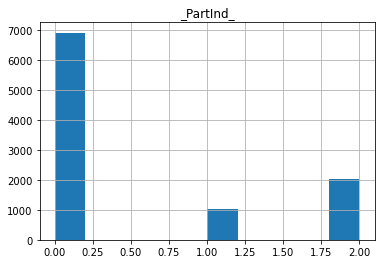

In [29]:
stratOut['_PartInd_'].hist()

## Use panda syntax directly on parquet data through CAS

In [30]:
megacorpParquet = s.CASTable('megacorp5_4m_part.parquet', caslib='dnfs')

In [31]:
megacorpParquet.describe()

NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.006057 seconds
NOTE:       cpu time                0.006031 seconds (99.57%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  687.66K (0.00%)
NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.005633 seconds
NOTE:       cpu time                0.005608 seconds (99.56%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  682.44K (0.00%)
NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.006248 seconds
NOTE:       cpu time                0.006240 seconds (99.87%)
NOTE:       total nodes             1 (16 cores)
NOTE:       tota

,Date,DateByYear,DateByMonth,DayOfWeek,FacilityID,FacilityAge,EmployeesUsed,UnitID,UnitDowntime,UnitAge,ExpensesCapital,ExpensesOperational,ExpensesMaterial,ExpensesStaffing,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
count,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.522868e+06,4.488736e+06,4.488736e+06
mean,1.435769e+04,1.417742e+04,1.434292e+04,3.970025e+00,2.357616e+01,1.190023e+01,1.501356e-01,2.510356e+01,2.593553e-02,3.021364e+00,4.301874e+00,4.090751e+00,8.403357e+00,1.168764e+01,-9.509106e+01,3.760325e+01,-9.582274e+01,3.532191e+01,-9.529980e+01,3.461898e+01
std,2.628581e+03,2.626478e+03,2.628570e+03,1.516514e+00,1.634613e+01,7.480959e+00,2.902115e-01,1.634659e+01,1.589430e-01,2.239992e+00,6.079166e+01,7.571435e+00,2.857872e+01,2.484473e+01,1.052113e+01,3.852695e+00,1.237893e+01,4.323310e+00,1.234068e+01,5.173266e+00
min,7.305000e+03,7.305000e+03,7.305000e+03,1.000000e+00,2.000000e+00,0.000000e+00,4.846153e-02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.523810e-01,0.000000e+00,3.510417e+00,-1.155303e+02,3.425528e+01,-1.199918e+02,3.098397e+01,-1.224183e+02,2.780028e+01
25%,1.245300e+04,1.241900e+04,1.245000e+04,3.000000e+00,8.000000e+00,6.000000e+00,6.545454e-02,1.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.784091e+00,3.609890e-01,4.360465e+00,-9.231789e+01,3.425528e+01,-9.968263e+01,3.116902e+01,-9.739611e+01,3.069417e+01
50%,1.456400e+04,1.424500e+04,1.454900e+04,4.000000e+00,2.400000e+01,1.100000e+01,8.896548e-02,2.500000e+01,0.000000e+00,3.000000e+00,0.000000e+00,2.292553e+00,6.661331e-01,6.423077e+00,-9.064271e+01,3.425528e+01,-9.245323e+01,3.416825e+01,-9.228944e+01,3.350917e+01
75%,1.641900e+04,1.607100e+04,1.640600e+04,5.000000e+00,3.600000e+01,1.700000e+01,1.211111e-01,3.800000e+01,0.000000e+00,5.000000e+00,0.000000e+00,3.180233e+00,8.721437e+00,9.028528e+00,-9.064271e+01,4.105957e+01,-8.673328e+01,3.973930e+01,-8.765000e+01,3.916194e+01
max,1.899200e+04,1.862800e+04,1.896200e+04,7.000000e+00,6.400000e+01,3.100000e+01,2.019999e+00,6.700000e+01,1.000000e+00,9.000000e+00,2.000000e+04,9.500000e+01,3.311320e+03,1.955000e+02,-7.309218e+01,4.357489e+01,-7.155220e+01,4.727295e+01,-7.145528e+01,4.760639e+01


In [32]:
m=megacorpParquet.sample(1000)

NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.005975 seconds
NOTE:       cpu time                0.005940 seconds (99.41%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  678.53K (0.00%)
NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.006113 seconds
NOTE:       cpu time                0.006086 seconds (99.56%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  682.56K (0.00%)


In [33]:
m.shape

(1000, 46)

## Distributed CAS engine based data preprocessing directly from parquet file

In [51]:
s.stratified(display={"names":"STRAFreq"},
              output={"casOut":{"caslib":"casuser","name":"out", "replace":True}, "copyVars":"ALL"},
              samppct=10, samppct2=20, partind=True, seed=10,
              table={"caslib":"dnfs", "name":"megacorp5_4m.parquet", "groupBy":{"FacilityRegion"}},
              outputTables={"names":{"STRAFreq"},"replace":True})




NOTE: Executing action 'table.loadTable'.
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.006648 seconds
NOTE:       cpu time                0.006629 seconds (99.71%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  696.69K (0.00%)
NOTE: Executing action 'sampling.stratified'.
NOTE: Stratified sampling is in effect.
NOTE: Using SEED=10 for sampling.
NOTE: The CAS table 'STRAFreq' in caslib 'mydata' has 4 rows and 5 columns.
NOTE: Action 'sampling.stratified' used (Total process time):
NOTE:       real time               3.569273 seconds
NOTE:       cpu time                47.465551 seconds (1329.84%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  383.20M (0.30%)


,ByGrpID,FacilityRegion,NObs,NSamp1,NSamp2
0,0,East,168920,16892,33784
1,1,North,935612,93561,187123
2,2,South,2553782,255378,510757
3,3,West,864554,86455,172911


In [27]:
s.about()

NOTE: Grid node action status report: 1 nodes, 28 total actions executed.


[About]

 {'CAS': 'Cloud Analytic Services',
  'Version': '3.05',
  'VersionLong': 'V.03.05M0P11112019',
  'Copyright': 'Copyright © 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2021-06-30T13:34:34Z',
  'System': {'Hostname': 'frasepviya35smp.cloud.com',
   'OS Name': 'Linux',
   'OS Family': 'LIN X64',
   'OS Release': '3.10.0-1160.31.1.el7.x86_64',
   'OS Version': '#1 SMP Thu Jun 10 13:32:12 UTC 2021',
   'Model Number': 'x86_64',
   'Linux Distribution': 'CentOS Linux release 7.9.2009 (Core)'},
  'license': {'site': 'viya35_25May2021',
   'siteNum': 70180938,
   'expires': '25May2022:00:00:00',
   'gracePeriod': 45,
   'warningPeriod': 45}}

[server]

 Server Status
 
    nodes  actions
 0      1       28

[nodestatus]

 Node Status
 
                         name        role    uptime  running  stalled
 0  frasepviya35smp.cloud.com  controller  1291.917        0        0

+ Elapsed: 0.00117s, user: 0.000145s, sys: 0.00101s, mem: 0.305mb

In [41]:
s.terminate()